
# Project: Investigating Movie revenue trends & genres through the years

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>The Dataset under analysis is set containing with their relevant information, the main attribute under investigation is the Revenues of these movies.This analysis will try to answer some questions such as :                                         
    1) how the season in which the movie is released in affects its profit ?                                                
    2) do some genres generate more profit than the others ?                                                                   
    3) does the runtime affects the movie profits or not ?
    4) what is the relation between average movie votes and the movie profit ?
    5) does a higher budget yields a higher profit ? 


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 




In [2]:
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>We will now drop columns that will not be of use to us such as non adjusted budget and revenue , homepage,tagline,keywords,etc since they will not be of value while investigating the profits 

In [7]:
df.drop(['budget','revenue','homepage','imdb_id','tagline','keywords','overview','production_companies','vote_count'],axis = 1,inplace = True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB



### Data Cleaning :
#### Step 1, investigate null values :
1) Cast 

In [9]:
df[df.cast.isnull()].head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,6.9,2015,0.0,0.0
441,355020,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,8.2,2015,0.0,0.0
465,321109,0.201696,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,7.8,2015,0.0,0.0
536,333350,0.122543,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,8.0,2015,0.0,0.0
538,224972,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,8.9,2015,0.0,0.0


#### Most of  the movies without their cast listed are documentries or animation films which do not have any information about their budgets or revenue so we will drop them 


In [10]:
df.dropna(subset=['cast'],inplace = True)


2) director:

In [11]:
df[df.director.isnull()].head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,6.6,2015,0.0,0.0
548,355131,0.108072,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,7.5,2015,0.0,0.0
556,321160,0.100910,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,6.5,2015,0.0,0.0
1032,259910,0.291253,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,6.3,2014,0.0,0.0
1054,253675,0.269468,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,7.2,2014,0.0,0.0


### Most of these movies are under the feature film length therefore they can be dropped without having an effect on our dataset

In [12]:
df.dropna(subset=['director'],inplace = True )


3) genres and feature length cleaning:

In [13]:
df[df.genres.isnull()].head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,6.1,2015,0.0,0.0
997,287663,0.330431,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,6.8,2014,0.0,0.0
1712,21634,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,7.4,2009,0.0,0.0
1897,40534,0.020701,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,7.0,2009,0.0,0.0
2370,127717,0.081892,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,6/5/10,5.8,2010,0.0,0.0


### The same condition as the above two cleaning condition applies Here , so We will drop them also we will drop movies which have runtime less than feature film which is 70 minutes according to Screen Actors Guild and more than 210. Movies released before 2000 will also be dropped to keep our analysis relevant to modern movies , Moreover we will remove movies that did not generate any income

In [14]:
df.dropna(subset=['genres'],inplace = True)
df = df[df['runtime']>70]
df = df[df['runtime']<210]
df = df[df['release_year']>2000]
df = df[df['revenue_adj']>0]
df.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


### We will now add a few things to our dataset that will be of use :
> 1) we will add a season column to know the season in which the movie was released. (1:Winter , 2:Spring, 3:Summer, 4:Autumn)

> 2) get the most the significant genre of the movie (i.e the first one before the '|' character).

> 3) get the most the significant Cast of the movie (i.e the first one before the '|' character) 

> 4) get the most the significant Director of the movie (i.e the first one before the '|' character) 

> 5) get the net proift (revenue - budget).

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#df ['new_date'] = pd.to_datetime(df.release_date.str[:-3])

df['season'] =  pd.to_datetime(df['release_date']).dt.month%12 // 3 + 1
df['release_date'] = pd.to_datetime(df['release_date'])
df['genre'] = df.genres.str.split('|').apply(lambda x : x[0])
df['leadingRole'] = df.cast.str.split('|').apply(lambda x : x[0])
df['leadingDirector'] = df.director.str.split('|').apply(lambda x : x[0])
df['profit'] = df['revenue_adj']-df['budget_adj']
#grpbydf = df.groupby('genres')['vote_average'].mean()


#df['Season'] = pd.cut(df['release_date'],bins = ['1/3','1/6','1/11'])
#df.head()
#grpbydf





<a id='eda'></a>
## Exploratory Data Analysis




### We will now explore some of the Data : 

firstly, what is the composition of genres in the dataset ? 


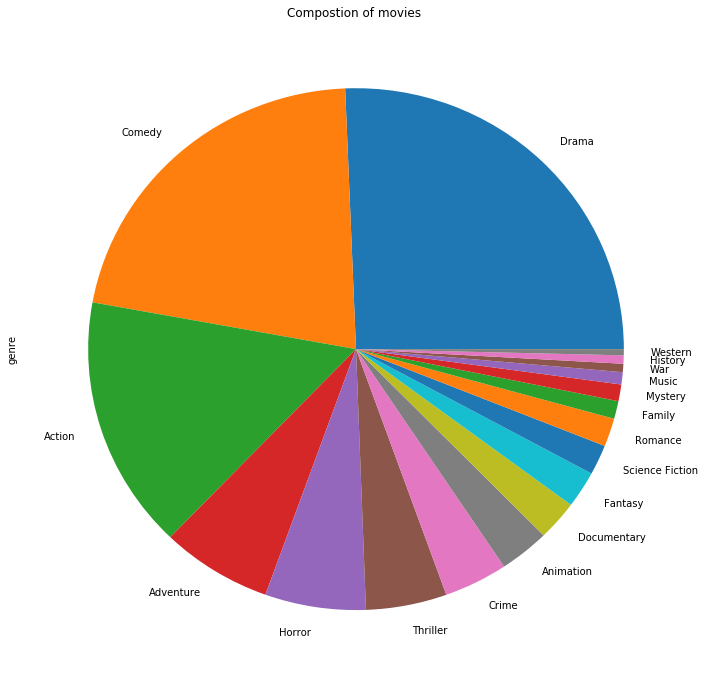

In [16]:
df['genre'].value_counts().plot(kind = 'pie',figsize=(12,12));


plt.title('Compostion of movies ');

### We will recogninze the 5 major genres are Drama , Comedy , Action , Adventure , Horror 

### We will now see the distribution of our vote average ratings , we will group by the vote_average and plot a histogram


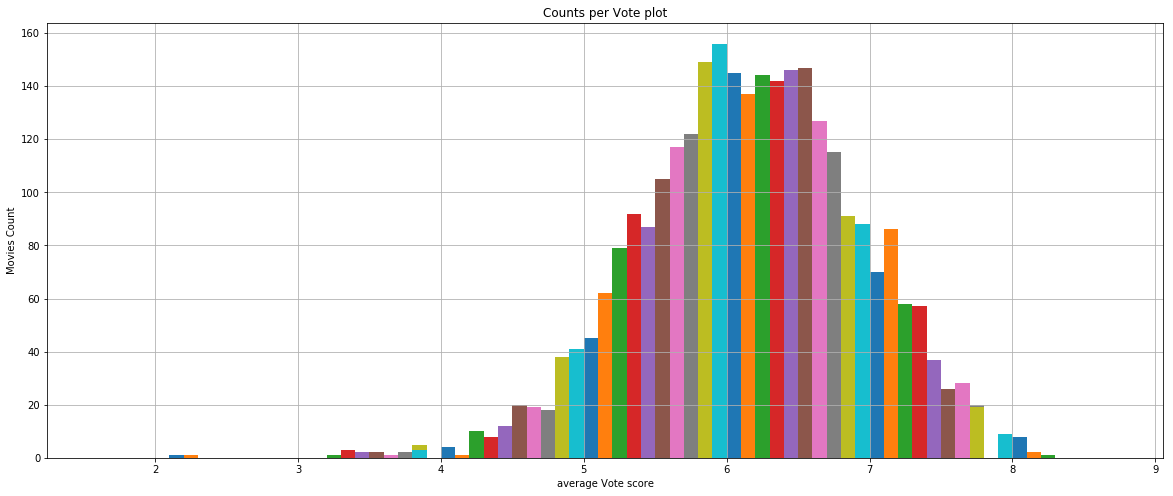

In [17]:
rating_df = df.groupby('vote_average')
I = rating_df['vote_average'].hist( figsize=(20,8));

plt.ylabel('Movies Count');
plt.xlabel('average Vote score');
plt.title('Counts per Vote plot');

### The figure above shows that most of the movies have an average vote score of 6

### The number of movies released per year :


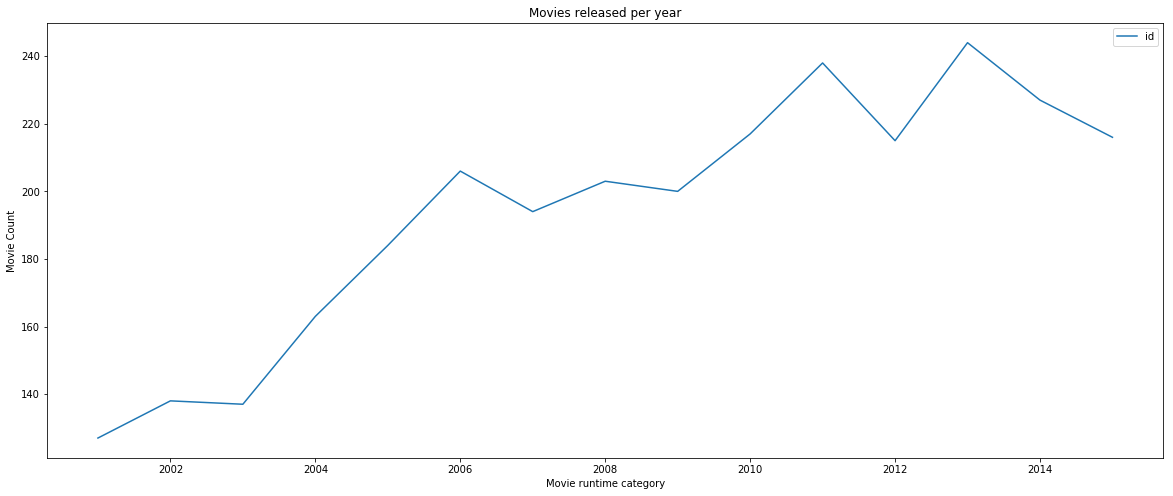

In [18]:
release_df = df.groupby('release_year').count()
release_df = release_df.reset_index()
#release_df.plot (x = 'release_year' , kind = 'line')
release_df.plot(y = 'id', x = 'release_year', kind = 'line' , figsize=(20,8) );

plt.ylabel('Movie Count');
plt.xlabel('Movie runtime category');
plt.title('Movies released per year');

## We Will start now with explorations of Data that relates to profits.


### How does the season in which a movie is released affects its revenue while taking into consideration the budget ?

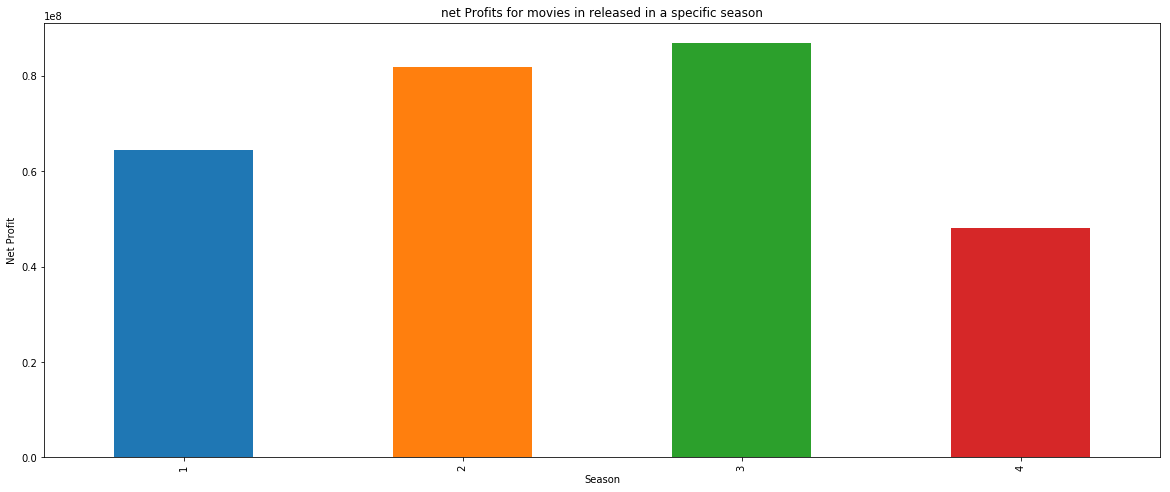

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
season_df = df.groupby('season')['profit'].mean()
season_df.plot(x='season' , y = ['profit'] , kind = 'bar' , figsize=(20,8));


plt.ylabel('Net Profit');
plt.xlabel('Season');
plt.title('net Profits for movies in released in a specific season');

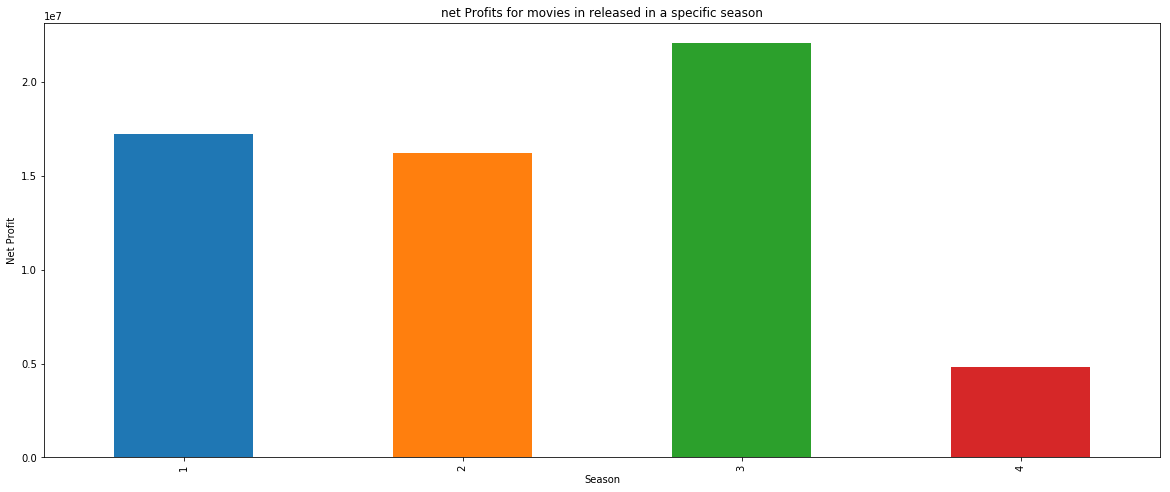

In [20]:
season_df = df.groupby('season')['profit'].median()
season_df.plot(x='season' , y = ['profit'] , kind = 'bar' , figsize=(20,8));

plt.ylabel('Net Profit');
plt.xlabel('Season');
plt.title('net Profits for movies in released in a specific season');

Finding number 1 :
movies released in the summer generate higher Profit on average compared to other movies released in other seasons 

### Which genre generated the most Profit ?  
 

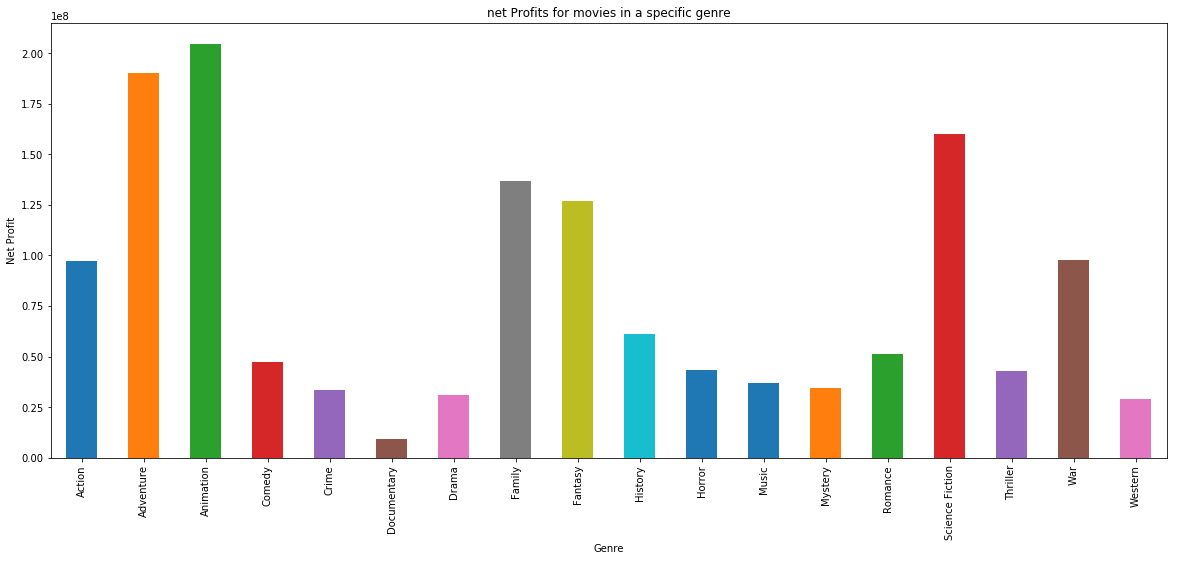

In [21]:

genre_df = df.groupby('genre')['profit'].mean()
genre_df.plot(x='genre' , y = 'profit' , kind = 'bar' , figsize=(20,8)); 


plt.ylabel('Net Profit');
plt.xlabel('Genre');
plt.title('net Profits for movies in a specific genre');

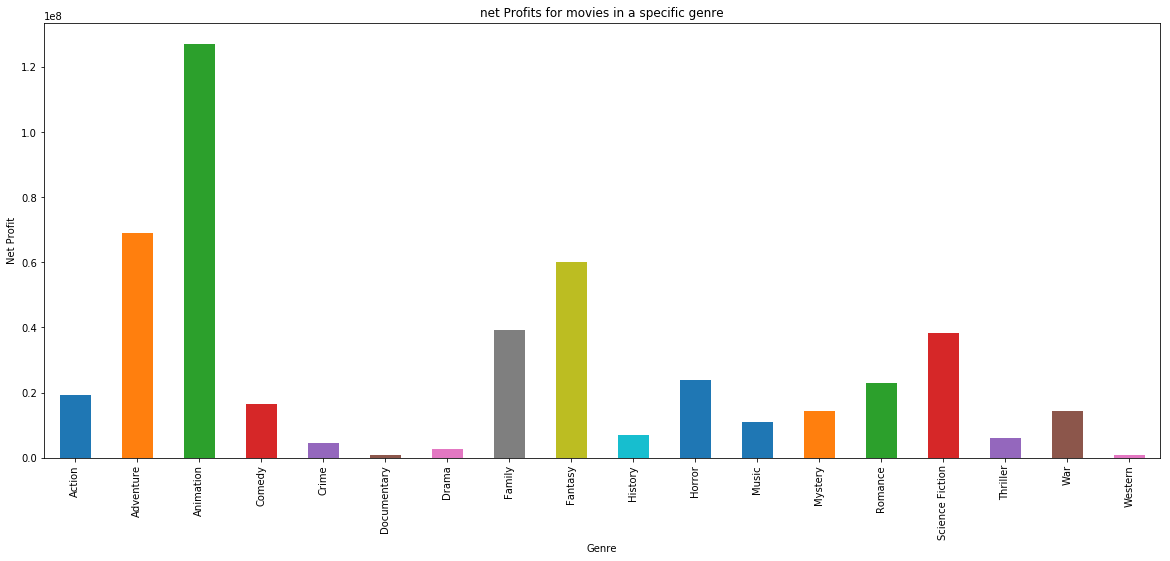

In [22]:
genre_df = df.groupby('genre')['profit'].median()
genre_df.plot(x='genre' , y = 'profit' , kind = 'bar' , figsize=(20,8));


plt.ylabel('Net Profit');
plt.xlabel('Genre');
plt.title('net Profits for movies in a specific genre');

Finding number 2: Animation movies generate the most net profit on average while documentaries generate the less net profit



### Does runtime affect a movie revenue ?
> we will cut the runtime into categories using the min , 25% , 50%,75%,Max quartiles

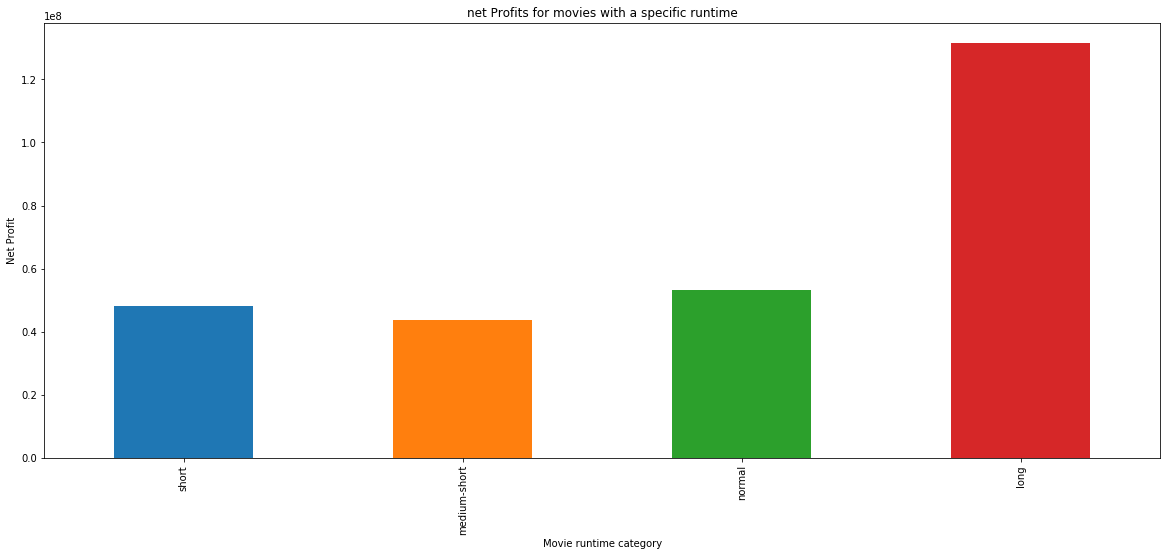

In [23]:
df['runtime_desc'] = pd.cut(df['runtime'],[72,94,104,116,201],labels = ["short","medium-short","normal","long"])

runtime_dfmean = df.groupby('runtime_desc')['profit'].mean()

runtime_dfmean.plot(x='runtime_desc' , y = 'profit' , kind = 'bar' , figsize=(20,8));

plt.ylabel('Net Profit');
plt.xlabel('Movie runtime category');
plt.title('net Profits for movies with a specific runtime');
#runtime_dfmedian.plot(x='runtime_desc' , y = 'profit' , kind = 'bar' );

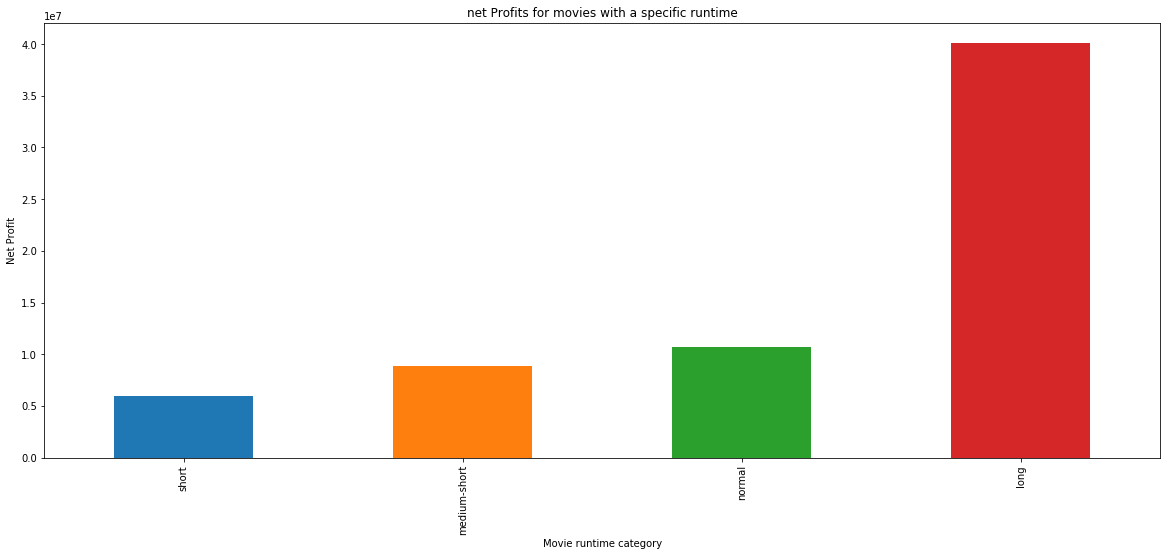

In [24]:
runtime_dfmedian = df.groupby('runtime_desc')['profit'].median()
runtime_dfmedian.plot(x='runtime_desc' , y = 'profit' , kind = 'bar' ,  figsize=(20,8));

plt.ylabel('Net Profit');
plt.xlabel('Movie runtime category');
plt.title('net Profits for movies with a specific runtime');

Finding number 3: Movies which have a run time between 116 and 201 generate the most profit on average 

### We will now investigate the relation between the average vote and the profit of the movie using a scatter plot:


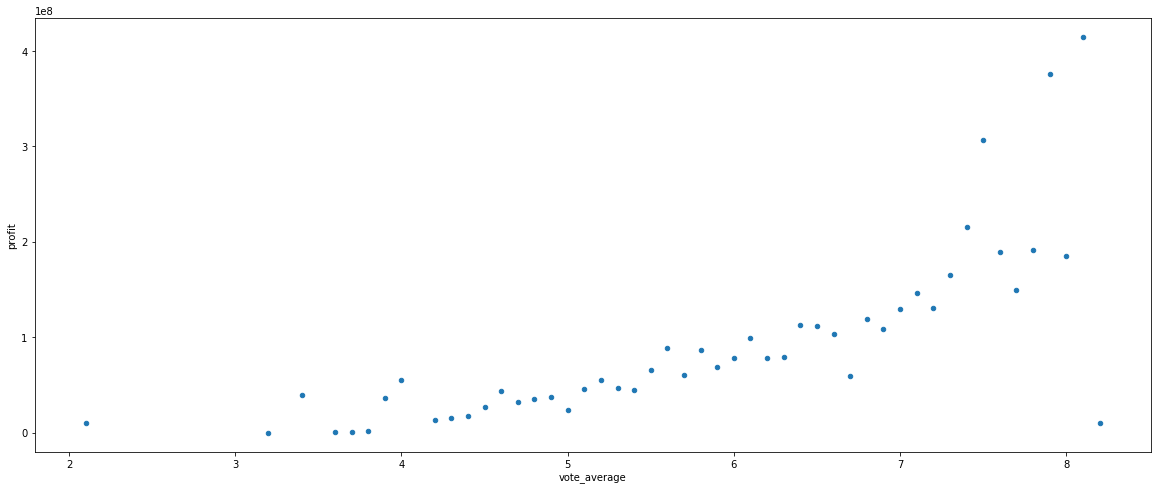

In [25]:
above_zero = df[df['profit']>0]
above_zero=above_zero.groupby('vote_average').mean().reset_index()
above_zero.head()
above_zero.plot(kind = 'scatter' , x = 'vote_average' , y = 'profit' , figsize=(20,8));


### Now we will investigate profit against the movie budget popularity ( basically the question here does a higher budget increases the chance of a higher profit? ) :

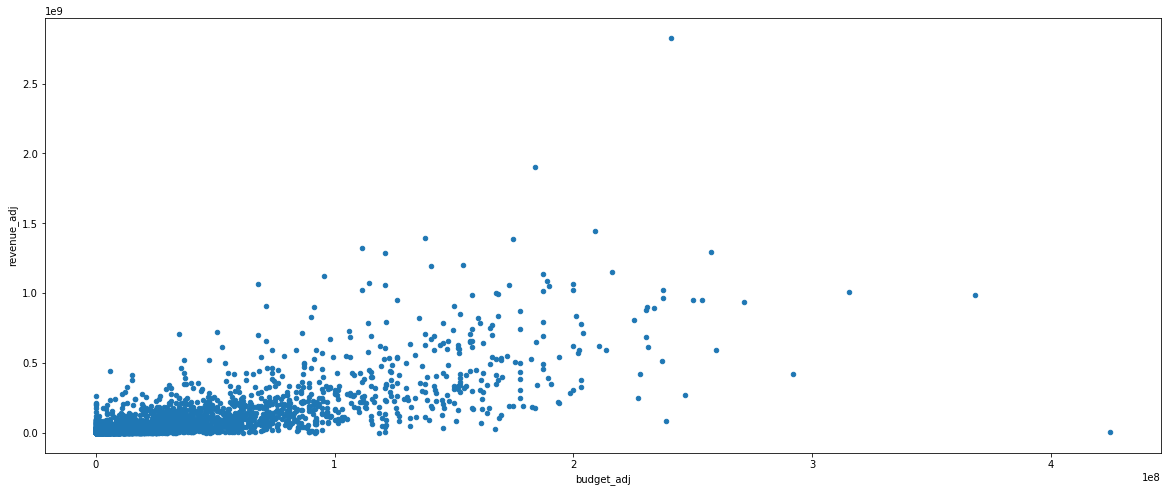

In [26]:
df.plot(kind = 'scatter' , x = 'budget_adj' , y = 'revenue_adj' , figsize=(20,8));


We can detect a rising trend we can confirm it using a correlation matrix

### Now we will draw a correlation matrix to see if they support findings above :

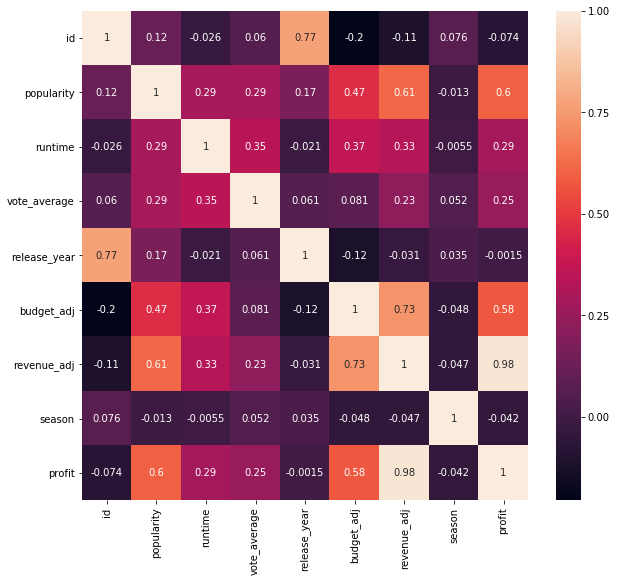

In [27]:
corrMt = df.corr()
plt.figure(figsize = (10,9))
sn.heatmap(corrMt, annot=True )
plt.show()

<a id='conclusions'></a>
## Conclusions
> The findings above have a number of constraints as stated above ; most of the analysis are done on commercial movies other movies are ignored however the purpose of the analysis is to find attributes of high grossing movies therefore the imposed constraints and cleaning done are justified and helps in with dealing with a lot of values 

### Findings : 
> Movies released in the summer tend to generate more profits thant other movies 

> Movies of the animation genre generate more profits than other movies while they are not one of the 5 movie genres that make up 3/4 of the movies ( refer to pie chart above) 

> Movies with  runtime between 116 and 201 minutes generates the more profit compared to other movies with runtimes less than 116 minutes 

> Movies with higher vote_averages tend to earn more profit by average

> there is a somewhat strong positive co-relation between budget and profit indicated by the coefficient of 0.58

### Limitations :

>some movies like the "Avatar - james Cameron" generated a lot of revenue which can lead to some anamolies while using the mean function therefore the mean and the median were used to verify that those figures are true and not actual anomalies 

>When cleaning the data I removed other genres and left the first one which could lead that some movies were categorised wrongly 






In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0